In [1]:
import torch
import torch.nn as nn

from utils.DataLoader import Loader
from models.ECGNet import BaselineNet
from utils.OpeModel import OpeModel
from utils.Draw import plot_loss_acc
from utils.Draw import plot_cfm
from utils.Draw import Landscape

from torchsummary import summary

In [2]:
model = BaselineNet(classCount=5)
loader = Loader(classCount=5)

classes, train_loader, test_loader = loader.loader()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
opemodel = OpeModel(model, device, lr=0.0004, trLoader=train_loader, teLoader=test_loader)

In [4]:
opemodel.load_state('full', 96.45, 100, 5)

+-----+-------+-------+-------+-------+
|     |  ACC  |  SEN  |  SPE  |  PPR  |
+-----+-------+-------+-------+-------+
|  F  | 0.993 | 0.533 | 0.997 | 0.667 |
|  N  | 0.975 |  0.99 | 0.945 | 0.973 |
|  Q  | 0.999 |  0.5  |  1.0  |  1.0  |
|  S  | 0.982 | 0.811 | 0.992 | 0.869 |
|  V  |  0.98 | 0.953 |  0.99 |  0.97 |
| SUM | 0.986 | 0.964 | 0.991 | 0.964 |
+-----+-------+-------+-------+-------+


<Figure size 432x288 with 0 Axes>

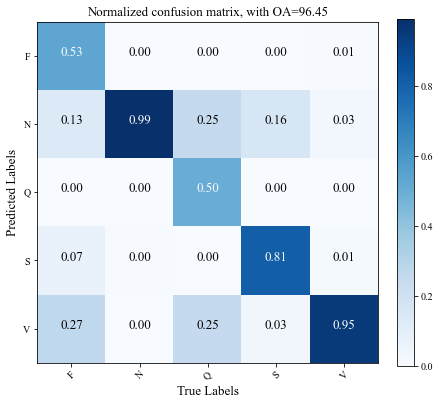

In [5]:
# opemodel.train_strategy_c(100)

model, acc, loss = opemodel.get_state()
# opemodel.load_state('full', 96.45, 100, 5)
plot_cfm(model, test_loader, classes, 'full', 100, 5)


In [ ]:
opemodel.save_state('full', 100, cnt=5)